## <center><strong><span style= 'color: #51fcc6'>Notebook </span>Describtion

In this notebook we will vizualize the issues in the data to determine what are the issues and how<br>
will they be fixed using SQL querries <sub>*(In the queries folder)</sub> also we will dive into the text data to find<br>
the issues.

#### **Important note:**
1. The feature extraction will be done using SQL with some data cleaning more about that in the queries<br>
   folder.
<br><br>
2. Most of the data manipulations in this notebook will be done using SQL commands inside the python <br>code.

#### **Table of contents:**
- Basic data graping & exploring
- Essential data cleaning
- Visualizing the data issues
- Cleaning the jobs data
- Cleaning the freelancing data
- Saving the data

## <center><strong>Importing the <span style= 'color: #48e0dc'>Packeges</span>

In [1]:
import os
import warnings
import pandas             as pd
import numpy              as np
import seaborn            as sns
import matplotlib.pyplot  as plt

from google.cloud         import bigquery
from IPython.display      import set_matplotlib_formats

In [2]:
%matplotlib inline
set_matplotlib_formats('pdf', 'svg')
warnings.filterwarnings('ignore')

credentials_path :str = '../credentials.json'
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = credentials_path

FONT             :int  = 15
COLORS           :list = ['#51fcc6', '#48e0dc', '#5cd3f7', '#4895e0', '#517afc']
NUMERICS         :list = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64',
                          'uint16', 'uint32', 'uint64']

C:\Users\FreeComp\AppData\Local\Temp\ipykernel_17648\2189705237.py:2: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('pdf', 'svg')


## <center><strong>Data reading & basic <span style= 'color: #5cd3f7'> Exploring

In [3]:
project_id :str = 'data-jobs-analysis-db'
dataset_id :str = 'data_jobs_analysis_db'

client   = bigquery.Client(project= project_id)

linkedin_jobs    = client.query(f'SELECT * FROM {dataset_id}.linkedin_jobs;').to_dataframe()
upwork_profiles  = client.query(f'SELECT * FROM {dataset_id}.upwork_profiles;').to_dataframe()
guru_profiles    = client.query(f'SELECT * FROM {dataset_id}.guru_profiles;').to_dataframe()

#### **LinkedIn data Exploring**

In [4]:
linkedin_jobs.sample(5)

,Unnamed: 0,jobs_locations,listing_dates,jobs_titles,companies_names,jobs_links,describtion,location_type,employment_type,industry,reqierd_credential,country,job_title,total_jobs
813,<NA>,"San Francisco, CA",2023-07-15,Database Engine Internals - Software Engineer,Databricks,https://www.linkedin.com/jobs/view/database-en...,Our mission at Databricks is to radically simp...,None,INTERN,Software Development,bachelor degree,United States,Data engineer,76000
1592,<NA>,"Milpitas, CA",2023-01-14,Senior Software Engineer,Recruiting from Scratch,https://www.linkedin.com/jobs/view/senior-soft...,&lt;strong&gt;Who is Recruiting from Scratch: ...,None,FULL_TIME,Staffing and Recruiting,bachelor degree,European Union,ML developer,989
2363,<NA>,"Fremont, CA",2023-05-11,Python Developer,Info Way Solutions,https://www.linkedin.com/jobs/view/python-deve...,"Hi Professionals,&lt;p&gt;&lt;br&gt;&lt;/p&gt;...",None,CONTRACTOR,IT Services and IT Consulting,bachelor degree,European Union,Data scientist,142000
367,<NA>,"San Francisco, CA",2023-05-04,Sr. Data Engineer (Hybrid/Remote),"University of California, San Francisco",https://www.linkedin.com/jobs/view/sr-data-eng...,F_IT EIA Core and Compliance&lt;p&gt;&lt;br&gt...,None,FULL_TIME,Higher Education,bachelor degree,United States,Data engineer,76000
1950,<NA>,"Petaluma, CA",None,CareMore Customer Care Representatives (Remote),Elevance Health,https://www.linkedin.com/jobs/view/caremore-cu...,&lt;ul&gt;&lt;li&gt;Job Family: Customer Care&...,TELECOMMUTE,FULL_TIME,Hospitals and Health Care,high school,European Union,Data entry,264000


In [5]:
linkedin_jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3521 entries, 0 to 3520
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          0 non-null      Int64 
 1   jobs_locations      3521 non-null   object
 2   listing_dates       3414 non-null   object
 3   jobs_titles         3521 non-null   object
 4   companies_names     3521 non-null   object
 5   jobs_links          3521 non-null   object
 6   describtion         3455 non-null   object
 7   location_type       403 non-null    object
 8   employment_type     3455 non-null   object
 9   industry            3414 non-null   object
 10  reqierd_credential  3276 non-null   object
 11  country             3521 non-null   object
 12  job_title           3521 non-null   object
 13  total_jobs          3521 non-null   Int64 
dtypes: Int64(2), object(12)
memory usage: 392.1+ KB


from only those two methods we found that there are many proplems in this table just to<br> 
name a few with those methods only:
- Inconsistent DTypes
- Issues in the text data
- Many NAN values
- New useless column

& bunch more we will see after we dive more in the next sections.

#### **Guru data Exploring**

In [6]:
guru_profiles.sample(5)

,Unnamed: 0,describtion,earnings_amount,feedback,name,job_title,addresse,hour_rate,minimum_pay,skills,data_job_title
1758,<NA>,Certified Risk Manager with 10 years of experi...,None,None,Aleigha S,Risk Manager and Data Scientist,"Palm Beach Gardens, Florida, United States",$20/hr\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t...,Starting at\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\...,"['Data Scientist', 'Credit Risk', 'Finance', '...",Data scientist
1685,<NA>,Senior data engineer\n I can writing and impro...,ID Verified,None,Hossam Emam,"Senior data engineer , SQL Expert","Alexandria, Al Iskandariyah, Egypt",$15/hr\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t...,Starting at\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\...,"['Data Engineering', 'Data Management', 'Data ...",Data Engineering
1507,<NA>,Make classification and Segmentation for breas...,None,None,eslam khaled sheta,Machine learning using Matlab With GUI,"Cario, Al Jizah, Egypt",$6/hr\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\...,Starting at\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\...,"['Machine Learning', 'Algorithms', 'Computer V...",Machine Learning
1276,<NA>,I am an individual Data Entry freelancer aimin...,None,None,Md.shahriar Sagor 1,"Virtual Assistant,Data Entry Expert","Bonsree Dhaka, Dhaka, Bangladesh",$15/hr\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t...,Starting at\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\...,"['Data Entry', 'Ad Posting', 'Administrative A...",Data entry
318,<NA>,I am a Data entry operator in one year ago We ...,None,None,Manish Raju 1,Online Data entry Data Entry Specialist,"Kanpur Nagar, Uttar Pradesh, India",$8/hr\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\...,Starting at\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\...,"['Data Entry', 'Analytics', 'Data Analysis', '...",Data entry


In [7]:
guru_profiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1900 entries, 0 to 1899
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       0 non-null      Int64 
 1   describtion      1900 non-null   object
 2   earnings_amount  215 non-null    object
 3   feedback         99 non-null     object
 4   name             1900 non-null   object
 5   job_title        1900 non-null   object
 6   addresse         1900 non-null   object
 7   hour_rate        1900 non-null   object
 8   minimum_pay      1900 non-null   object
 9   skills           1900 non-null   object
 10  data_job_title   1900 non-null   object
dtypes: Int64(1), object(10)
memory usage: 165.3+ KB


Oh we can find that this table is even more worse than the previous one. 

#### **UpWork data Exploring**

In [8]:
upwork_profiles.sample(5)

,Unnamed: 0,describtion,earnings_amount,feedback,name,job_title,country,hour_rate,consultations_offers,skills,data_job_title
227,<NA>,Virtual Assistant + Lead Generation + Customer...,$8K+,100.0,Rabia S.,"Virtual Assistant, Data Entry & Lead Generation",Pakistan,$7.00,Doesn't offer consultations,"['Data Mining', 'Microsoft Excel', 'Administra...",Data entry
440,<NA>,I have an engineering background and a PhD deg...,$40K+,100.0,Sergey S.,"Excel Expert, VBA Programmer and Data Analyst",Ukraine,$50.00,Doesn't offer consultations,"['Dashboard', 'Data Analysis', 'Data Mining', ...",Data Analyst
786,<NA>,Helping to build Analytics-Driven Organization...,$10M+,98.0,Sanjay K.,Microsoft Power BI Developer | Power BI Data V...,India,$20.00,Doesn't offer consultations,"['Microsoft Power BI Development', 'Web Develo...",Data Engineering
372,<NA>,Unlocking the Power of Data: Transforming Comp...,$20K+,100.0,Abduljelil A.,Data Analyst | BI Developer,Nigeria,$35.00,Doesn't offer consultations,"['Dashboard', 'Data Analysis', 'Python', 'Tabl...",Data Analyst
546,<NA>,My late-adolescence interest in Quantified Sel...,$2K+,77.0,Gabriele G.,Data analyst / Data scientist / BizDev Analyst,Italy,$27.50,Doesn't offer consultations,"['Python', 'R', 'Statistics', 'API', 'Google S...",Data scientist


In [9]:
upwork_profiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            0 non-null      Int64  
 1   describtion           950 non-null    object 
 2   earnings_amount       791 non-null    object 
 3   feedback              870 non-null    float64
 4   name                  950 non-null    object 
 5   job_title             950 non-null    object 
 6   country               950 non-null    object 
 7   hour_rate             950 non-null    object 
 8   consultations_offers  950 non-null    object 
 9   skills                950 non-null    object 
 10  data_job_title        950 non-null    object 
dtypes: Int64(1), float64(1), object(9)
memory usage: 82.7+ KB


Wow until now this is the most clean table but we will stillwe didn't do the full exploring yet.

## <center><strong>Data issues <span style= 'color: #4895e0'> Visualization

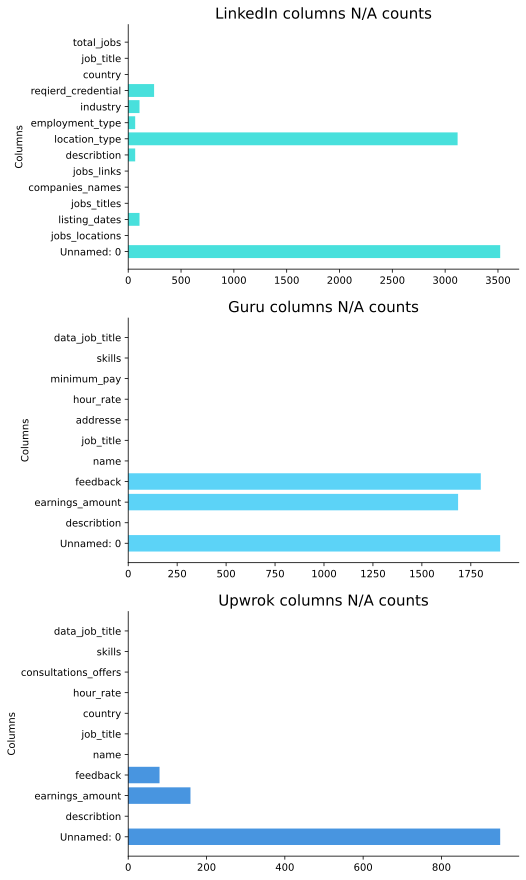

In [128]:
fig, axes = plt.subplots(3, 1)

linkedin_null_count = []
guru_null_count     = []
upwork_null_count   = []

for col in linkedin_jobs.columns:
    linkedin_null_count  .append(linkedin_jobs[col].isnull().sum())
    
for col in guru_profiles.columns:
    guru_null_count      .append(guru_profiles[col].isnull().sum())
    
for col in upwork_profiles.columns:
    upwork_null_count    .append(upwork_profiles[col].isnull().sum())

    
axes[0].barh(linkedin_jobs.columns, linkedin_null_count, color= COLORS[1])
axes[0].set_title("LinkedIn columns N/A counts", fontsize= FONT)
axes[0].spines[['right', 'top']].set_visible(False)

axes[1].barh(guru_profiles.columns, guru_null_count, color= COLORS[2])
axes[1].set_title("Guru columns N/A counts", fontsize= FONT)
axes[1].spines[['right', 'top']].set_visible(False)

axes[2].barh(upwork_profiles.columns, upwork_null_count, color= COLORS[3])
axes[2].set_title("Upwrok columns N/A counts", fontsize= FONT)
axes[2].spines[['right', 'top']].set_visible(False)



for ax in fig.axes:
    plt.sca(ax)
    plt.ylabel("Columns") 

fig.set_size_inches(7, 15)
# plt.savefig("plots/null counts detailed.svg")
plt.show()

`Unnamed: 0` column refers to the total records counts.

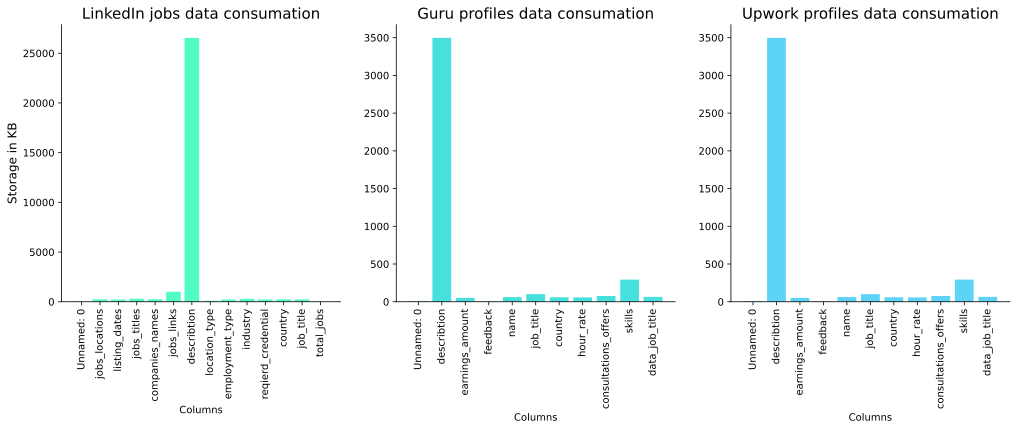

In [13]:
fig, axes = plt.subplots(1, 3)

linkedin_consumation = linkedin_jobs   .memory_usage(index= False, deep= True).values // 1024
linkedin_cols        = linkedin_jobs   .memory_usage(index= False, deep= True).index

guru_consumation     = upwork_profiles .memory_usage(index= False, deep= True).values // 1024
guru_cols            = upwork_profiles .memory_usage(index= False, deep= True).index

upwork_consumation   = upwork_profiles .memory_usage(index= False, deep= True).values // 1024
upwork_cols          = upwork_profiles .memory_usage(index= False, deep= True).index

axes[0].bar(x= linkedin_cols,  height= linkedin_consumation,  color= COLORS[0])
axes[1].bar(x= guru_cols,      height= guru_consumation,      color= COLORS[1])
axes[2].bar(x= upwork_cols,    height= upwork_consumation,    color= COLORS[2])

axes[0].spines[['right', 'top']].set_visible(False)
axes[1].spines[['right', 'top']].set_visible(False)
axes[2].spines[['right', 'top']].set_visible(False)

axes[0].set_title("LinkedIn jobs data consumation"  , fontsize= FONT)
axes[1].set_title("Guru profiles data consumation"  , fontsize= FONT)
axes[2].set_title("Upwork profiles data consumation", fontsize= FONT)

axes[0].set_ylabel("Storage in KB", fontsize = 12)

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)
    plt.xlabel("Columns")
    
fig.set_size_inches(17, 5)
plt.show()

In [43]:
linkedin_duplicates = linkedin_jobs   .apply(lambda x: x.duplicated().sum())
guru_duplicates     = guru_profiles   .apply(lambda x: x.duplicated().sum())
upwork_duplicates   = upwork_profiles .apply(lambda x: x.duplicated().sum())



NameError: name 'df' is not defined

In [42]:
pd.DataFrame(duplicates_series

,0
Unnamed: 0,3520
jobs_locations,3422
listing_dates,3347
jobs_titles,2194
companies_names,2603
jobs_links,0
describtion,1688
location_type,3519
employment_type,3513
industry,3349
